# Обобщени полиноми. Интерполиране с обобщени полиноми

### Задача 1

В таблицата са дадени данни за развитието на бактериална популация

|  t, h  |  1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- | 
| бр. клетки (x1000)|  1 |12| 110 | 1037 | 12218 |

Да се намери подходяща функция, която интерполира данните. Да се начертаят данните и графиката на функцията в една координатна система.

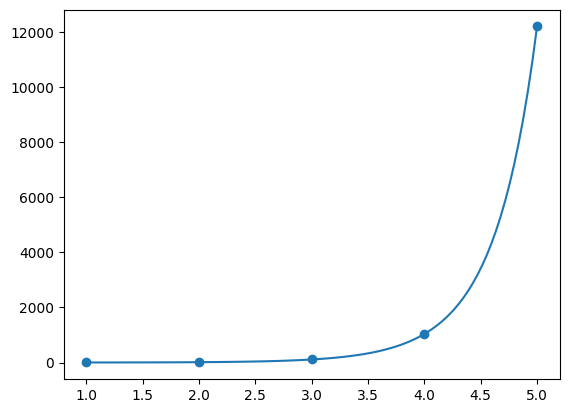

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
A = np.zeros([n,n])
x = [1,2,3,4,5]
vals = [1,12,110,1037,12218]
#Aij = e^(j*xi)
for i in range(n):
    for j in range(n):
        A[i,j] = np.e**(j * x[i])

bases = np.array([1, np.e, np.e**2, np.e**3, np.e**4])
coef = np.linalg.solve(A, vals)
def y(x):
    return bases[0] * coef[0] + (bases[1] ** x) * coef[1] + (bases[2] ** x) * coef[2] + (bases[3] ** x) * coef[3] + (bases[4] ** x) * coef[4]

space = np.linspace(1,5,100)
plt.plot(space, y(space))
plt.scatter(x, vals)
plt.show()


### Задача 2

Пациент приема 5 mg/L от лекарство в момент t=0. В таблицата е описана промяната на концентрацията на лекарството в кръвта на пациента часове след приемането му
|  t, h  |  1 | 2 | 3 | 4 |
| --- | --- | --- | --- | --- | 
| concentration, mg/L|  1.571 |1.158| 1.049 | 1.018 |

Да се построи интерполационен полином по подходящ базис, който описва данните. Начертайте получения полином и съответните данни в една координатна система.

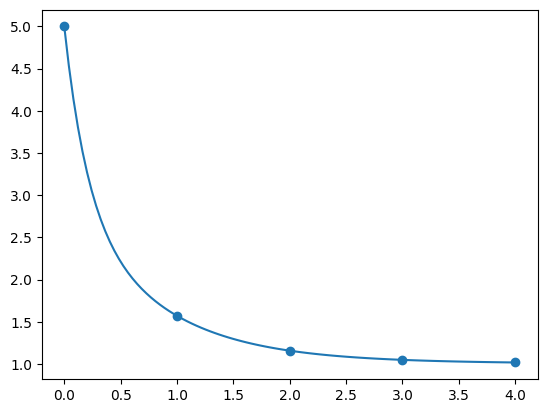

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
A = np.zeros([n,n])
x = [0,1,2,3,4]
vals = [5, 1.571, 1.158, 1.049, 1.018]

def basic_functions(x):
    return np.array([1, np.e**(-x), np.e**(-2*x), np.e**(-3*x), np.e**(-4*x)])

#Aij = e^(j*xi)
for i in range(n):
    A[i] = basic_functions(x[i])

coef = np.linalg.solve(A, vals)
def y(x):
    return (coef[0]
            + coef[1]*np.exp(-x)
            + coef[2]*np.exp(-2*x)
            + coef[3]*np.exp(-3*x)
            + coef[4]*np.exp(-4*x))

space = np.linspace(0, 4, 100)
plt.plot(space, y(space))
plt.scatter(x, vals)
plt.show()


### Задача 3


Дадени са данни за брой часове слънчева светлина, където x е денят от годината. Да се намери функция, която моделира броя часове слънчева светлина.

|  x|  0 | 61 | 152 | 243 | 334 |
| --- | --- | --- | --- | --- |---|
| часове слънчева светлина|  9 |11| 15 | 13 | 9.5 |

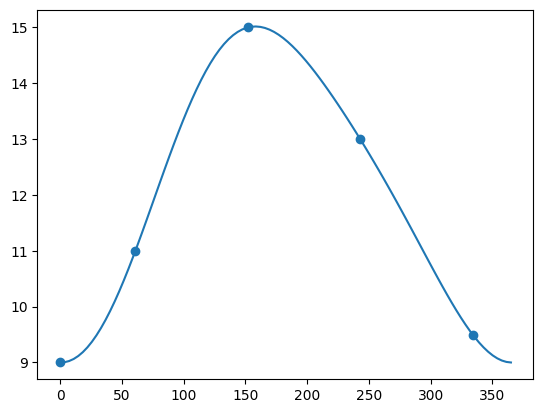

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
A = np.zeros([n,n])
norm_x = [0, 61, 152, 243, 334]
x = [xi * (2 * np.pi) / 365 for xi in norm_x]

vals = [9, 11, 15, 13, 9.5]

def basic_functions(x):
    return np.array([1, np.sin(x), np.cos(x), np.sin(2*x), np.cos(2*x)])

#Aij = e^(j*xi)
for i in range(n):
    A[i] = basic_functions(x[i])

coef = np.linalg.solve(A, vals)
def y(x):
    return coef[0] + np.sin(x) * coef[1] + np.cos(x) * coef[2] + np.sin(2*x) * coef[3] + np.cos(2*x) * coef[4]

space = np.linspace(0, 365, 100)
plt.plot(space, y(space * (2 * np.pi) / 365))
plt.scatter(norm_x, vals)
plt.show()


### Задача 4

В таблицата са дадени данни от сигнал на акселерометър в 5 момента от време:

|  t, ms  |  1 | 1.5 | 3 | 4 | 6 |
| --- | --- | --- | --- | --- | --- | 
| ускорение, $m/s^2$|  0 |1| 1.2 | 4 | 2 |

Да се намери обобщен полином по подходящ базис, който интерполира тези данни, ако е известно, че сигналът се описва от периодична функция с период а) $T=2\pi$; б) $T=8$.
Да се начертае графиката на полинома в интервала $[0, 4 \pi]$ заедно с точките в една координатна система във всеки от случаите.

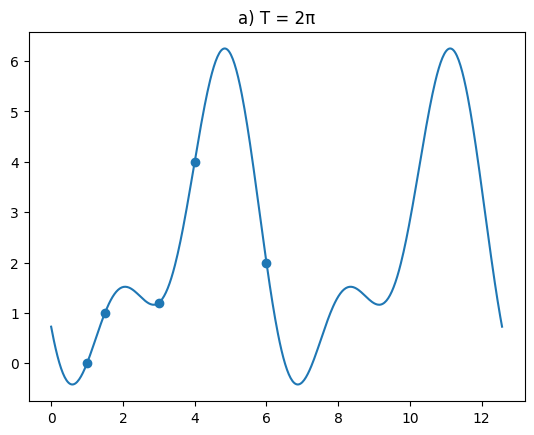

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# given data
# in notes there is error and x begins from 0 the graph there is wrong
x = np.array([1, 1.5, 3, 4, 6])
vals = np.array([0, 1, 1.2, 4, 2])

n = 5

# ---- a) T = 2π ----
A = np.zeros((n,n))

# in your original solution you start with sin
# but in the notes they start from cosine
# chat gpt says that they are both correct
# the outcome graph is not affected by the swap
def basis(x):
    return np.array([1, np.cos(x), np.sin(x), np.cos(2*x), np.sin(2*x)])

for i in range(n):
    A[i] = basis(x[i])

coef = np.linalg.solve(A, vals)

def y_a(x):
    return (coef[0] +
            coef[1]*np.cos(x) + coef[2]*np.sin(x) +
            coef[3]*np.cos(2*x) + coef[4]*np.sin(2*x))

space = np.linspace(0, 4*np.pi, 500)

plt.plot(space, y_a(space))
plt.scatter(x, vals)
plt.title("a) T = 2π")
plt.show()


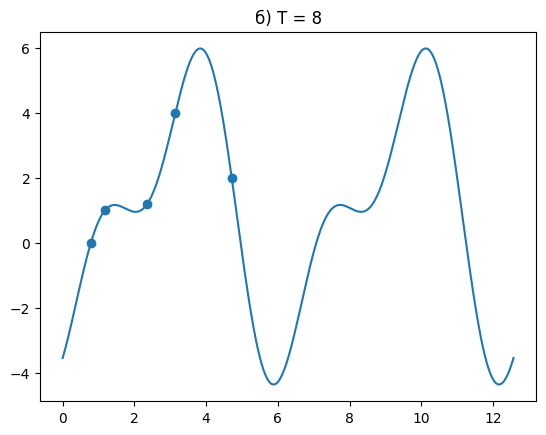

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# данни
t = np.array([1, 1.5, 3, 4, 6])
vals = np.array([0, 1, 1.2, 4, 2])

# преминаване към ъглова променлива
x = t * 2*np.pi / 8

# тригонометричен базис
def basis(x):
    return np.array([1,
                     np.cos(x), np.sin(x),
                     np.cos(2*x), np.sin(2*x)])

n = 5
A = np.zeros((n, n))
for i in range(n):
    A[i] = basis(x[i])

# решаване на системата
coef = np.linalg.solve(A, vals)

# интерполационен полином
def y_b(x):
    return (coef[0]
            + coef[1]*np.cos(x) + coef[2]*np.sin(x)
            + coef[3]*np.cos(2*x) + coef[4]*np.sin(2*x))

# графика в [0, 4π] (както е в условието)
space = np.linspace(0, 4*np.pi, 500)
plt.plot(space, y_b(space))
plt.scatter(x, vals)
plt.title("б) T = 8")
plt.show()


### Задача 5


В таблицата са дадени данни за средните месечни количества слънчева радиация на територията на България, като лиспват данни за м. август

|  t, месец  |  Я | Ф | М | А | М | Ю | Ю | A | С | O | Н | Д |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| слънчева радиация, $W/m^2$|45.9| 78.2 | 123.5| 172.6| 223.5| 255.3| 286.0| | 183.9| 116.2 | 57.8| 37.7|

Данните са осреднени на 30 дни, т.е. можем да считаме, че разстоянието между измерванията в два съседни месеца е 30. Като се има предвид това, както и факта, че разглежданият процес е с период 365 дни, да се намери обобщен полином по подходящ базис, който описва данните в таблицата. Като се използва така намереният полином, да се пресметне приближено количеството слънчева радиация, съответстващо на м. август. Да се сравни с действителната стойност - $257.9 W/m^2$.

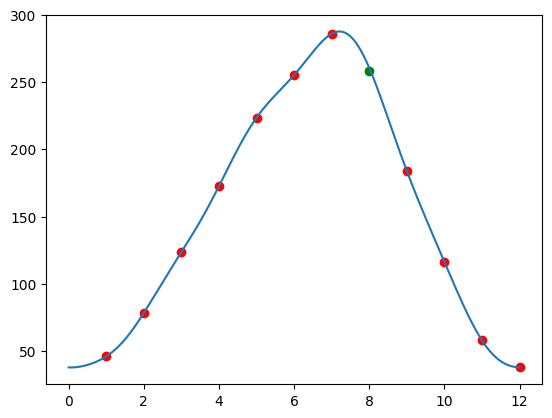

In [12]:
import numpy as np
import matplotlib.pyplot as plt

norm_x = np.array([1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12])
vals = np.array([45.9, 78.2, 123.5, 172.6, 223.5, 255.3, 286.0, 183.9, 116.2, 57.8, 37.7])

n = len(norm_x)
x = norm_x * (2 * np.pi) / 12

def basis(x):
    return np.array([1, np.sin(x), np.cos(x), np.sin(2*x), np.cos(2*x), np.sin(3*x), np.cos(3*x), np.sin(4*x), np.cos(4*x), np.sin(5*x), np.cos(5*x)])

A = np.zeros((n, 11))
for i in range(n):
    A[i] = basis(x[i])

coef = np.linalg.solve(A, vals)

def y_b(x):
    return (coef[0] + coef[1]*np.sin(x) + coef[2]*np.cos(x) +
        coef[3]*np.sin(2*x) + coef[4]*np.cos(2*x) +
        coef[5]*np.sin(3*x) + coef[6]*np.cos(3*x) +
        coef[7]*np.sin(4*x) + coef[8]*np.cos(4*x) +
        coef[9]*np.sin(5*x) + coef[10]*np.cos(5*x))


space = np.linspace(0, 12, 500)
plt.plot(space, y_b(space * (2 * np.pi) / 12))
plt.scatter(norm_x, vals, color="red")
plt.scatter(8, 257.9, color="green")
plt.show()


По условието имаме 5 точки, периодичен сигнал с период T=3 ms и трябва да се намери тригонометричен интерполационен полином след подходяща смяна на променливата и да се чертае в оригиналната променлива 𝑡.
|   t (ms) | 0 | 1 | 1.5 | 2 | 2.5 |
| -------: | - | - | --- | - | --- |
| a (m/s²) | 0 | 1 | 1.5 | 4 | 2   |


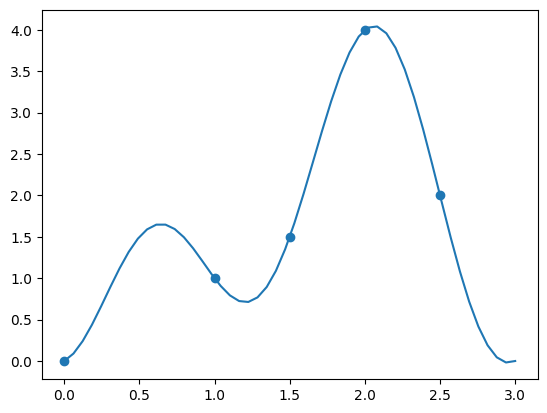

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array([0,1,1.5,2,2.5])
vals = np.array([0,1,1.5,4,2])

x = (t * 2 * np.pi) / 3
n = 5

A = np.zeros((n,n))

def basis(x):
    return np.array([1, np.cos(x), np.sin(x), np.cos(2*x), np.sin(2*x)])

for i in range(n):
    A[i] = basis(x[i])
    
coef = np.linalg.solve(A, vals)

def f(x):
    return (coef[0] 
            + np.cos(x) * coef[1] 
            + np.sin(x) * coef[2] 
            + np.cos(2 * x) * coef[3]
            + np.sin(2 * x) * coef[4])
    
space = np.linspace(0, 3)
plt.plot(space, f((space * 2 * np.pi) / 3))
plt.scatter(t, vals)
plt.show()